<a href="https://colab.research.google.com/github/yashjain-99/Projects/blob/main/CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Car Price Prediction using Tensorflow
Dataset used: Used Cars Price Prediction at Kaggle by @Avi Kasliwal

author: @Yash Jain(https://github.com/yashjain-99)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import os

In [ ]:
local_zip = '/content/drive/MyDrive/Colab Notebooks/archive (3).zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
os.mkdir('/content/CarPricePred')
zip_ref.extractall('/content/CarPricePred')
zip_ref.close()

In [ ]:
test_data=pd.read_csv('/content/CarPricePred/test-data.csv')
train_data=pd.read_csv('/content/CarPricePred/train-data.csv')

In [ ]:
train_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
train_data.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [ ]:
train_data.drop(columns=['Unnamed: 0', 'Name', 'New_Price'], axis=1, inplace=True)

In [ ]:
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [ ]:
train_data.isnull().sum()

Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [ ]:
train_data.dropna(inplace=True)

In [ ]:
train_data.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5975 non-null   object 
 1   Year               5975 non-null   int64  
 2   Kilometers_Driven  5975 non-null   int64  
 3   Fuel_Type          5975 non-null   object 
 4   Transmission       5975 non-null   object 
 5   Owner_Type         5975 non-null   object 
 6   Mileage            5975 non-null   object 
 7   Engine             5975 non-null   object 
 8   Power              5975 non-null   object 
 9   Seats              5975 non-null   float64
 10  Price              5975 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 560.2+ KB


In [ ]:
import re

train_data['Mileage'] = pd.Series([re.sub('[^.0-9]', '', 
    str(val)) for val in train_data['Mileage']], index = train_data.index)
train_data['Engine'] = pd.Series([re.sub('[^.0-9]', '', 
    str(val)) for val in train_data['Engine']], index = train_data.index)
train_data['Power'] = pd.Series([re.sub('[^.0-9]', '', 
    str(val)) for val in train_data['Power']], index = train_data.index)

In [ ]:
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


In [ ]:
train_data = train_data.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
train_data.isnull().sum()

Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                103
Seats                  0
Price                  0
dtype: int64

In [ ]:
train_data.dropna(inplace=True)

In [ ]:
train_data.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5872 non-null   object 
 1   Year               5872 non-null   int64  
 2   Kilometers_Driven  5872 non-null   int64  
 3   Fuel_Type          5872 non-null   object 
 4   Transmission       5872 non-null   object 
 5   Owner_Type         5872 non-null   object 
 6   Mileage            5872 non-null   object 
 7   Engine             5872 non-null   object 
 8   Power              5872 non-null   object 
 9   Seats              5872 non-null   float64
 10  Price              5872 non-null   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 550.5+ KB


In [ ]:
train_data['Mileage'] = pd.Series([float(str(val)) 
    for val in train_data['Mileage']], index = train_data.index)
train_data['Engine'] = pd.Series([float(str(val)) 
    for val in train_data['Engine']], index = train_data.index)
train_data['Power'] = pd.Series([float(val) 
    for val in train_data['Power']], index = train_data.index)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5872 non-null   object 
 1   Year               5872 non-null   int64  
 2   Kilometers_Driven  5872 non-null   int64  
 3   Fuel_Type          5872 non-null   object 
 4   Transmission       5872 non-null   object 
 5   Owner_Type         5872 non-null   object 
 6   Mileage            5872 non-null   float64
 7   Engine             5872 non-null   float64
 8   Power              5872 non-null   float64
 9   Seats              5872 non-null   float64
 10  Price              5872 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 550.5+ KB


One-Hot Encoding 

In [ ]:
print(train_data['Fuel_Type'].unique())

['CNG' 'Diesel' 'Petrol' 'LPG']


In [ ]:
train_data['Fuel_Type'] = pd.Categorical(train_data['Fuel_Type'])
dfFuel_Type = pd.get_dummies(train_data['Fuel_Type'])
dfFuel_Type.head()

,CNG,Diesel,LPG,Petrol
0,1,0,0,0
1,0,1,0,0
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0


In [ ]:
print(train_data['Location'].unique())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']


In [ ]:
train_data['Location'] = pd.Categorical(train_data['Location'])
dfLocation = pd.get_dummies(train_data['Location'])
dfLocation.head()

,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
print(train_data['Transmission'].unique())

['Manual' 'Automatic']


In [ ]:
train_data['Transmission'] = pd.Categorical(train_data['Transmission'])
dfTransmission = pd.get_dummies(train_data['Transmission'])
dfTransmission.head()

,Automatic,Manual
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


In [ ]:
print(train_data['Owner_Type'].unique())

['First' 'Second' 'Fourth & Above' 'Third']


In [ ]:
train_data['Owner_Type'] = pd.Categorical(train_data['Owner_Type'])
dfOwner_Type = pd.get_dummies(train_data['Owner_Type'])
dfOwner_Type.head()

,First,Fourth & Above,Second,Third
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,1,0


In [ ]:
print(train_data['Seats'].unique())

[ 5.  7.  8.  4.  6.  2. 10.  9.]


In [ ]:
train_data['Seats'] = pd.Categorical(train_data['Seats'])
dfSeats = pd.get_dummies(train_data['Seats'], prefix = 'Seats')
dfSeats.head()

,Seats_2.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0
0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0


In [ ]:
final_train = pd.concat([train_data, dfFuel_Type, dfLocation, dfTransmission, dfOwner_Type, dfSeats], axis=1)
final_train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,CNG,Diesel,LPG,Petrol,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Automatic,Manual,First,Fourth & Above,Second,Third,Seats_2.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [ ]:
final_train.drop(columns=['Fuel_Type', 'Location', 'Transmission', 'Owner_Type', 'Seats'], inplace=True, axis=1)

In [ ]:
final_train.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Price,CNG,Diesel,LPG,Petrol,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Automatic,Manual,First,Fourth & Above,Second,Third,Seats_2.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0
0,2010,72000,26.60,998.0,58.16,1.75,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0
1,2015,41000,19.67,1582.0,126.20,12.50,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0
2,2011,46000,18.20,1199.0,88.70,4.50,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0
3,2012,87000,20.77,1248.0,88.76,6.00,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,17.74,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [ ]:
final_train.columns

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price',
       'CNG', 'Diesel', 'LPG', 'Petrol', 'Ahmedabad', 'Bangalore', 'Chennai',
       'Coimbatore', 'Delhi', 'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata',
       'Mumbai', 'Pune', 'Automatic', 'Manual', 'First', 'Fourth & Above',
       'Second', 'Third', 'Seats_2.0', 'Seats_4.0', 'Seats_5.0', 'Seats_6.0',
       'Seats_7.0', 'Seats_8.0', 'Seats_9.0', 'Seats_10.0'],
      dtype='object')

In [ ]:
final_train = final_train[['Price', 'Year', 'Kilometers_Driven', 
    'Mileage', 'Engine', 'Power', 'CNG', 'Diesel', 'LPG', 'Petrol', 'Ahmedabad', 'Bangalore', 'Chennai',
       'Coimbatore', 'Delhi', 'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata',
       'Mumbai', 'Pune', 'Automatic', 'Manual', 'First', 'Fourth & Above',
       'Second', 'Third', 'Seats_2.0', 'Seats_4.0', 'Seats_5.0', 'Seats_6.0',
       'Seats_7.0', 'Seats_8.0', 'Seats_9.0', 'Seats_10.0']]
final_train.head()

,Price,Year,Kilometers_Driven,Mileage,Engine,Power,CNG,Diesel,LPG,Petrol,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Automatic,Manual,First,Fourth & Above,Second,Third,Seats_2.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0
0,1.75,2010,72000,26.60,998.0,58.16,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0
1,12.50,2015,41000,19.67,1582.0,126.20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0
2,4.50,2011,46000,18.20,1199.0,88.70,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0
3,6.00,2012,87000,20.77,1248.0,88.76,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0
4,17.74,2013,40670,15.20,1968.0,140.80,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [ ]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Price              5872 non-null   float64
 1   Year               5872 non-null   int64  
 2   Kilometers_Driven  5872 non-null   int64  
 3   Mileage            5872 non-null   float64
 4   Engine             5872 non-null   float64
 5   Power              5872 non-null   float64
 6   CNG                5872 non-null   uint8  
 7   Diesel             5872 non-null   uint8  
 8   LPG                5872 non-null   uint8  
 9   Petrol             5872 non-null   uint8  
 10  Ahmedabad          5872 non-null   uint8  
 11  Bangalore          5872 non-null   uint8  
 12  Chennai            5872 non-null   uint8  
 13  Coimbatore         5872 non-null   uint8  
 14  Delhi              5872 non-null   uint8  
 15  Hyderabad          5872 non-null   uint8  
 16  Jaipur             5872 

In [ ]:
final_train['Price'] = pd.Series([float(val*100000) 
    for val in final_train['Price']], index = final_train.index)

In [ ]:
final_train.head()

,Price,Year,Kilometers_Driven,Mileage,Engine,Power,CNG,Diesel,LPG,Petrol,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Automatic,Manual,First,Fourth & Above,Second,Third,Seats_2.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0
0,175000.0,2010,72000,26.60,998.0,58.16,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0
1,1250000.0,2015,41000,19.67,1582.0,126.20,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0
2,450000.0,2011,46000,18.20,1199.0,88.70,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0
3,600000.0,2012,87000,20.77,1248.0,88.76,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0
4,1774000.0,2013,40670,15.20,1968.0,140.80,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [ ]:
test_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [ ]:
test_data.drop(columns=['Unnamed: 0', 'Name', 'New_Price'], axis=1, inplace=True)
test_data.dropna(inplace=True)

test_data['Mileage'] = pd.Series([re.sub('[^.0-9]', '', 
    str(val)) for val in test_data['Mileage']], index = test_data.index)
test_data['Engine'] = pd.Series([re.sub('[^.0-9]', '', 
    str(val)) for val in test_data['Engine']], index = test_data.index)
test_data['Power'] = pd.Series([re.sub('[^.0-9]', '', 
    str(val)) for val in test_data['Power']], index = test_data.index)

test_data = test_data.replace(r'^\s*$', np.nan, regex=True)
test_data.dropna(inplace=True)


test_data['Mileage'] = pd.Series([float(str(val)) 
    for val in test_data['Mileage']], index = test_data.index)
test_data['Engine'] = pd.Series([float(str(val)) 
    for val in test_data['Engine']], index = test_data.index)
test_data['Power'] = pd.Series([float(val) 
    for val in test_data['Power']], index = test_data.index)

In [ ]:
print(test_data.head())
test_data.info()
test_data.isna().sum()

     Location  Year  Kilometers_Driven  ...  Engine   Power Seats
0       Delhi  2014              40929  ...   998.0   58.20   4.0
1  Coimbatore  2013              54493  ...   796.0   47.30   5.0
2      Mumbai  2017              34000  ...  2393.0  147.80   7.0
4      Mumbai  2014              29000  ...  1197.0   82.85   5.0
5  Coimbatore  2016              85609  ...  2179.0  140.00   7.0

[5 rows x 10 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1233
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           1201 non-null   object 
 1   Year               1201 non-null   int64  
 2   Kilometers_Driven  1201 non-null   int64  
 3   Fuel_Type          1201 non-null   object 
 4   Transmission       1201 non-null   object 
 5   Owner_Type         1201 non-null   object 
 6   Mileage            1201 non-null   float64
 7   Engine             1201 non-null   fl

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

In [ ]:
test_data['Fuel_Type'] = pd.Categorical(test_data['Fuel_Type'])
dfFuel_Type2 = pd.get_dummies(test_data['Fuel_Type'])
dfFuel_Type2.head()
test_data['Location'] = pd.Categorical(test_data['Location'])
dfLocation2 = pd.get_dummies(test_data['Location'])
dfLocation2.head()
test_data['Transmission'] = pd.Categorical(test_data['Transmission'])
dfTransmission2 = pd.get_dummies(test_data['Transmission'])
dfTransmission2.head()
test_data['Owner_Type'] = pd.Categorical(test_data['Owner_Type'])
dfOwner_Type2 = pd.get_dummies(test_data['Owner_Type'])
dfOwner_Type2.head()
test_data['Seats'] = pd.Categorical(test_data['Seats'])
dfSeats2 = pd.get_dummies(test_data['Seats'], prefix = 'Seats')
dfSeats2.head()

,Seats_2.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_10.0
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0
5,0,0,0,0,1,0,0


In [ ]:
final_test = pd.concat([test_data, dfFuel_Type2, dfLocation2, dfTransmission2, dfOwner_Type2, dfSeats2], axis=1)
final_test.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,CNG,Diesel,LPG,Petrol,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Automatic,Manual,First,Fourth & Above,Second,Third,Seats_2.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_10.0
0,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
1,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
2,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0
4,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0
5,Coimbatore,2016,85609,Diesel,Manual,Second,16.00,2179.0,140.00,7.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
final_test.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'CNG', 'Diesel',
       'LPG', 'Petrol', 'Ahmedabad', 'Bangalore', 'Chennai', 'Coimbatore',
       'Delhi', 'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata', 'Mumbai', 'Pune',
       'Automatic', 'Manual', 'First', 'Fourth & Above', 'Second', 'Third',
       'Seats_2.0', 'Seats_4.0', 'Seats_5.0', 'Seats_6.0', 'Seats_7.0',
       'Seats_8.0', 'Seats_10.0'],
      dtype='object')

In [ ]:
final_test = final_test[['Year', 'Kilometers_Driven', 
    'Mileage', 'Engine', 'Power', 'CNG', 'Diesel', 'LPG', 'Petrol', 'Ahmedabad', 'Bangalore', 'Chennai',
       'Coimbatore', 'Delhi', 'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata',
       'Mumbai', 'Pune', 'Automatic', 'Manual', 'First', 'Fourth & Above',
       'Second', 'Third', 'Seats_2.0', 'Seats_4.0', 'Seats_5.0', 'Seats_6.0',
       'Seats_7.0', 'Seats_8.0', 'Seats_10.0']]
final_test.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,CNG,Diesel,LPG,Petrol,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune,Automatic,Manual,First,Fourth & Above,Second,Third,Seats_2.0,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_10.0
0,2014,40929,32.26,998.0,58.20,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
1,2013,54493,24.70,796.0,47.30,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0
2,2017,34000,13.68,2393.0,147.80,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0
4,2014,29000,18.50,1197.0,82.85,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0
5,2016,85609,16.00,2179.0,140.00,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0


In [ ]:
final_train.to_csv('/content/CarPricePred/final_train.csv', index=False)

In [ ]:
final_test.to_csv('/content/CarPricePred/final_test.csv', index=False)

Data Analysis

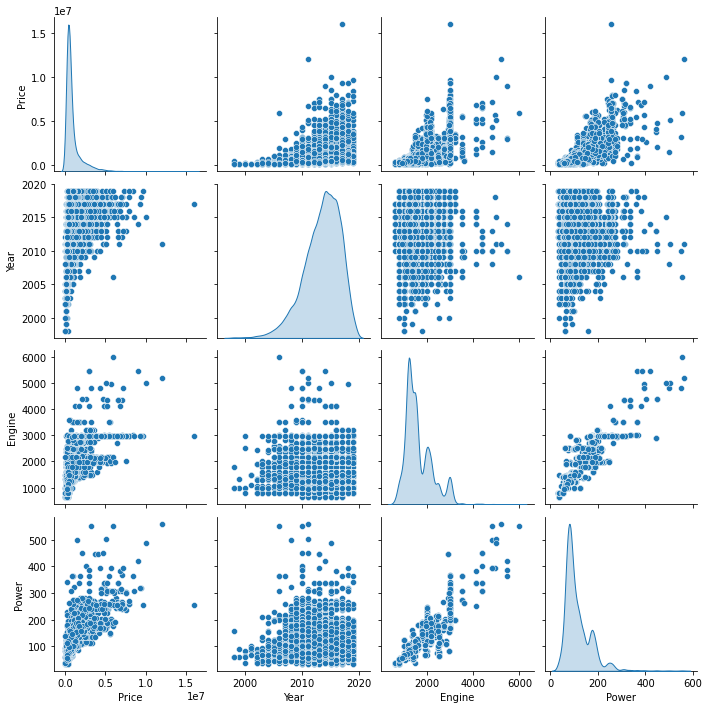

In [ ]:
import seaborn as sns
sns.pairplot(final_train[["Price", "Year", "Engine", "Power"]], 
    diag_kind="kde")

Continued in Next Notebook

Next Notebook Link: https://colab.research.google.com/drive/1trfvAjt6wap7xTN2xxV81klqVMQ6ZQOC?usp=sharing